In [1]:
!pip install investpy
!pip install matplotlib



     |████████████████████████████████| 4.4MB 4.3MB/s 
     |████████████████████████████████| 245kB 37.0MB/s 
     |████████████████████████████████| 6.3MB 40.1MB/s 
     |████████████████████████████████| 512kB 41.2MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-cp37-none-any.whl size=4495223 sha256=6714844ed9cb7bb7a794f234b53f19bf1408aec66c880f55345d51008f12c191
  Stored in directory: /root/.cache/pip/wheels/09/7e/f9/df627561fc57278456e61aa9c63a03dd08e436eb7deab834f0
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [2]:
import datetime
import investpy

today = datetime.date.today()
search_results = investpy.search_quotes(text='yar',
                                        products=['stocks'],
                                        countries=['norway'],                                        
                                        n_results=10)
a=search_results[0].retrieve_historical_data(from_date='01/01/2020', to_date=f'{today.day}/{today.month}/{today.year}')
print()

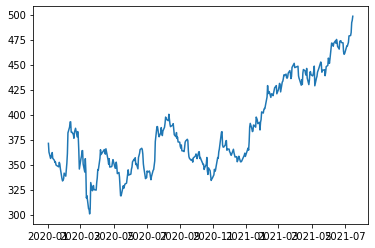

In [3]:
import matplotlib.pyplot as plt
plt.plot(a['High'])
plt.show()

In [15]:
import pandas as pd
import numpy as np

# Andre kolonne er antall aksjer for (barn, Ivar, Ivars pensjon)
# Siden det kommer mer til pensjon for hver måned, så har jeg foreløpig bare satt 
# pensjonen til å være 1 million, som den ca var i vår, så kan vi se utviklingen
# Ellers er det litt vanskelig å se utviklingen for pensjon
# Det betyr at pensjonen ikke er korrekt, fordi den ikke viser de månedlige tilleggene
# Pensjonen begynte i Kron ca 1. april 2021
p=[('Klp Aksjeglobal Mer Samfunnsansvar', (176, 125, 205),1,'funds','norway'),
   ('Klp Aksjeglobal Indeks V', (0,0,142),1,'funds','norway'),
   ('Klp Aksje Fremvoksende Marked Indeks II', (0,0,112.5),1,'funds','norway'),
   ('Storebrand Indeks - Nye Markeder A', (0,0,17.7),1,'funds','norway'),
    ('Microsoft Corporation',(0,97,0),8.5,'stocks','united states'),
    ('odin norge c',(12,0,0),1,'funds','norway'),
    ('odin norden c',(9.43,0,0),8.5,'funds','norway'),
    ('yar',(0,30,0),1,'stocks','norway'),
    ('eqnr',(0,50,0),1,'stocks','norway'),
    ('Schlumberger NV',(0,353,0),8.5,'stocks','united states')

]

raw_values = []

for i,t in enumerate(p):
    search_results = investpy.search_quotes(text=t[0],
                                        products=[t[3]],
                                        countries=[t[4]],                                        
                                        n_results=10)
    a=search_results[0].retrieve_historical_data(from_date='03/03/2020', to_date=f'{today.day}/{today.month}/{today.year}')    
    raw_values.append(a)
        


In [36]:
# Get unique dates
import pandas as pd

portefolje = -1 # 0 er barna, 1 er egen sparing, 2 er pensjon

sm = None
highs = None
cm = pd.DataFrame()

a = raw_values[0]
u = raw_values[0].index
for a in raw_values[1:]:  
    u.append(a.index)
u = u.unique()
cm = pd.DataFrame(u)
col_names = ['Date']
for a,t in zip(raw_values, p):  
  antallAksjer = t[1][portefolje]
  if portefolje == -1: # Spesiell, skal summere alle
    antallAksjer = sum(t[1])
  if antallAksjer == 0:
    continue # hvis ingen investering
  ser = a['High']*t[2]*antallAksjer
  cm=cm.merge(ser, on='Date')
  col_names.append(t[0])
cm.columns =  col_names # ['a','b','c','d','e','f','g','h']#



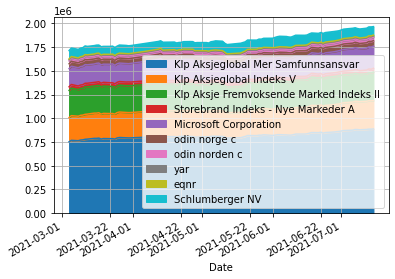

In [37]:
start_date =  pd.to_datetime('2021-03-03')
end_date =  pd.to_datetime('today')
mask =  (cm['Date'] > start_date) & (cm['Date'] <= end_date)
cm_sub = cm.loc[mask]
# print(a.index)

sb = cm_sub
sb.set_index(['Date'],inplace=True)
sb.plot.area()
plt.grid()
plt.show()

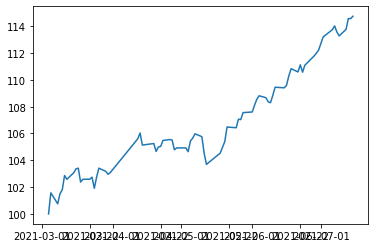

In [38]:
sm = cm_sub.sum(axis=1)
sm = 100*sm/sm[0]
plt.plot(sm)
plt.show()